In [70]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys


import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
#plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.figsize'] = (7.5, 5)
plt.rcParams['figure.dpi'] = 300
#plt.figure(figsize=(45,10))
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

u'0.20.3'

In [71]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [72]:
def add_treatment(dic, name, seed, series=None, longname=None, shortid=None, 
                  factors={}, skip_seeds=None,
                  location=None, filename=None):
    shortlabel = name
    if series:
        shortlabel = series + "_" + name
        
    if not longname:
        longname = "\n".join( name.split("_") )
                        
    if not location:
        if series:
            location = series + "_" + name + "_" + seed
        else:
            location = name + "_" + seed 
            
    if skip_seeds == None:
        skip_seeds = []
    
    dic[shortlabel] = {'longlabel': longname, 'shortlabel': shortlabel, 'series': series, 'id': shortid,
                  'dir': location, 'filename': filename, 'factors': factors, 'skip': skip_seeds} 

In [5]:
data_name = "100 CycleLengthSurvey"
data_number = "100"

treatments = collections.OrderedDict()

## control
add_treatment(treatments, seed="100", name="A1_control",
              longname="Control",
             factors={'cycle': "static", 'length': "0"})


## 1000u
add_treatment(treatments, seed="100", name="D2_noreward",
              longname="Benign 1000u",
             factors={'cycle': "benign", 'length': "1000"})
add_treatment(treatments, seed="100", name="D3_punish",
              longname="Harsh 1000u",
             factors={'cycle': "harsh", 'length': "1000"})



print treatments

OrderedDict([('A1_control', {'shortlabel': 'A1_control', 'skip': [], 'longlabel': 'Control', 'factors': {'length': '0', 'cycle': 'static'}, 'series': None, 'id': None, 'dir': 'A1_control_100', 'filename': None}), ('D2_noreward', {'shortlabel': 'D2_noreward', 'skip': [], 'longlabel': 'Benign 1000u', 'factors': {'length': '1000', 'cycle': 'benign'}, 'series': None, 'id': None, 'dir': 'D2_noreward_100', 'filename': None}), ('D3_punish', {'shortlabel': 'D3_punish', 'skip': [], 'longlabel': 'Harsh 1000u', 'factors': {'length': '1000', 'cycle': 'harsh'}, 'series': None, 'id': None, 'dir': 'D3_punish_100', 'filename': None})])


In [6]:
def setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/changing_environments/raw_data/", 
    scripts="~/Dropbox/School_Docs/Research/research_scripts/", 
                        verbose=False):
    
    global analysis_directory
    analysis_directory = "analysis"
    
    ## generated
    data_directory = "_".join(data_name.split(" "))
    global data_path
    data_path = base_path + data_directory
    analysis_path = data_path + "/" + analysis_directory
    global scripts_path
    scripts_path = scripts
    
#    global scripts_path
#    scripts_path = scripts_path

    if verbose:
        print "base_path:", base_path
        print "scripts_path:", scripts_path
        print "data_path:",data_path
        print "analysis_path", analysis_path
        print
        print "Treatments:"
        print treatments.keys()
        print
        print "Values:"
        for val in treatments.values():
            print val

In [7]:
def prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=False, length=200000):

    if verbose:
        print data_path
    %cd {data_path}
    %pwd
    !mkdir incomplete
    #if verbose:
    #    !pwd
    #    %pwd
    #%mkdir incomplete
    if verbose:
        !pwd
    #!ls
    
    if not skipchecks:
        bleh = []
        for t in treatments:
            print treatments[t]['dir']
            datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
            for item in datafiles:

                filepath = item +"/data/count.dat"
                if os.path.isfile(filepath):
                    line = !tail -n 1 $filepath
                elif os.path.isfile(filepath+".gz"):
                    filepath = filepath+".gz"
                    line = !zcat $filepath | tail -n 1
                else:
                    if verbose:
                        print "count.dat[.gz] not found."
                    line = ""

                filepath = item +"/data/average.dat"
                if not os.path.isfile(filepath) and not os.path.isfile(filepath+".gz"):
                    if verbose:
                        print "average.dat[.gz] not found."
                    line = ""



                #print filepath
                #bleh = line
                #print line
                #line = line.split(' ')[0]
                #print line
                if len(line) == 0 or line[0].split(' ')[0] != str(length):
                    if verbose:
                        print "Incomplete", item, line
                    if cleanup:
                        !mv $item incomplete/

    %mkdir {analysis_directory}
    %cd {analysis_directory}
    if verbose:
        %pwd

    for t in treatments:
        print
        print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
        for v in treatments[t]:
            print "  ",v,": ", treatments[t][v]
            


In [8]:
pwd

u'/Core/home/rosiec/Dropbox/School_Docs/Dissertation/dissertation_data/ipython_notebooks/Chapter_2_-_CE'

In [9]:
## Call the init methods 
setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/changing_environments/raw_data/", 
                    verbose=True)
prepare_analysis_directories(treatments, skipchecks=False, 
    cleanup=True, verbose=True, length=200000)

base_path: /Core/home/rosiec/__research/changing_environments/raw_data/
scripts_path: ~/Dropbox/School_Docs/Research/research_scripts/
data_path: /Core/home/rosiec/__research/changing_environments/raw_data/100_CycleLengthSurvey
analysis_path /Core/home/rosiec/__research/changing_environments/raw_data/100_CycleLengthSurvey/analysis

Treatments:
['A1_control', 'D2_noreward', 'D3_punish']

Values:
{'shortlabel': 'A1_control', 'skip': [], 'longlabel': 'Control', 'factors': {'length': '0', 'cycle': 'static'}, 'series': None, 'id': None, 'dir': 'A1_control_100', 'filename': None}
{'shortlabel': 'D2_noreward', 'skip': [], 'longlabel': 'Benign 1000u', 'factors': {'length': '1000', 'cycle': 'benign'}, 'series': None, 'id': None, 'dir': 'D2_noreward_100', 'filename': None}
{'shortlabel': 'D3_punish', 'skip': [], 'longlabel': 'Harsh 1000u', 'factors': {'length': '1000', 'cycle': 'harsh'}, 'series': None, 'id': None, 'dir': 'D3_punish_100', 'filename': None}
/Core/home/rosiec/__research/changing_e

In [10]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
test_data_accessibility(treatments)

/Core/home/rosiec/__research/changing_environments/raw_data/100_CycleLengthSurvey/analysis
regular cat
cat: ../A1_control_100001/data/log_average.dat: No such file or directory

zcat
# Avida Fitness Data
# Wed Oct 25 13:49:30 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
50 62.7428 0.17575 111.198 -inf -nan -nan 
100 63.6283 0.122404 53.743 4.0984 0.00996024 0.355853 
150 63.5611 0.12591 56.9612 4.09623 0.00997877 0.357776 
200 63.4338 0.132296 62.9203 4.09478 0.00974326 0.341277 
250 63.6809 0.117261 49.4183 4.1065 0.00918443 0.303168 
300 63.5218 0.124161 55.3276 4.09932 0.0096091 0.331389 
350 63.5151 0.122929 54.3713 4.09771 0.00983017 0.347683 
400 63.1541 0.147671 78.4603 4.06606 0.0119663 0.515205 
450 63.4071 0.12848 59.4091 4.09154 0.0101792 0.372913 

gzip: stdout: Broken pipe


In [11]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help
    
test_scripts_accessibilty(treatments)

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [12]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [13]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [14]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [15]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

# Task Use - Timeseries

In [16]:
%pwd

u'/Core/home/rosiec/__research/changing_environments/raw_data/100_CycleLengthSurvey/analysis'

In [23]:
%pwd 

def generate_data(use_pickled=False):
    picklename = "tasks_timeseries_1000only.pd.pickle"

    ## check for pickling!
    if use_pickled and os.path.exists(picklename):
        data = pd.read_pickle(picklename)
        return data
        
    
    
    data = []
    tct = 0
    for t in treatments:  
        tct += 1
        print t

        dfs = []

        for i in range(1,101):

            bit = str(i).zfill(2) ## runs from 01 to 50
            globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
            dfiles = sorted(glob.glob(globstring))

            for item in dfiles:
                sys.stdout.write('.')

                df = pd.read_csv(item, header=None, comment="#", 
                                  delimiter=' ', usecols=[0,1,2],
                                  skipinitialspace=True, 
                                  names=['update', 'XOR', 'EQU'] 
                                )


                df['id'] = [ treatments[t]['id'] ] * len(df)
                df['treatment'] = [t] * len(df)
                df['label'] = [ treatments[t]['longlabel'] ] * len(df)
                df['replicate'] = [i] * len(df)
                df['cycle'] = [treatments[t]['factors']['cycle']] * len(df)
                df['length'] = [treatments[t]['factors']['length']] * len(df)



                dfs.append( df )

        if len(dfs) > 0:
            intermediate = pd.concat(dfs)
            data.append(intermediate)

        print "  done"

    data = pd.concat(data)

    
    ## if we generate the data, pickle it
    data.to_pickle(picklename)

    return data

tasks = generate_data(use_pickled=True)  
print tasks.describe()
print tasks.head()

A1_control
..................................................  done
D2_noreward
..................................................  done
D3_punish
..................................................  done
              update            XOR            EQU      replicate
count  600150.000000  600150.000000  600150.000000  600150.000000
mean   100000.000000    3428.620252    2766.073292      25.500000
std     57749.506985     520.898707    1319.094381      14.430882
min         0.000000       0.000000       0.000000       1.000000
25%     50000.000000    3537.000000    2774.000000      13.000000
50%    100000.000000    3547.000000    3519.000000      25.500000
75%    150000.000000    3554.000000    3547.000000      38.000000
max    200000.000000    3592.000000    3583.000000      50.000000
   update   XOR   EQU    id   treatment    label  replicate   cycle length
0       0     0     0  None  A1_control  Control          1  static      0
1      50  3504  3506  None  A1_control  Control    

In [24]:
def plot_ts_violins(part, field):
    #part = control
    #print control

    plt.rcParams['figure.figsize'] = (18, 4)

    fig = plt.figure(figsize=(18, 4)) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1])
    ax0 = plt.subplot(gs[0])

    plt.title(data_number + " - " + field + "\n"+data_name)


    #plt.subplot(121)

    ax = sns.tsplot(time="update", value=field,
                    unit="replicate", 
                    condition="length",
                    data=part,
                    ci=[95],
                   # ax=ax0
                   )

    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    for i in range(0, len(xlocs)-1):
        xmodlocs.append( xlocs[i] )
        if i == 0:
            xmodlabels.append(int(xlocs[i]))
        else:
            print xlabels[i]
            print xlocs[i]
            xmodlabels.append(str(int(xlocs[i])/1000) + "k")
    plt.xticks( xmodlocs, xmodlabels )

#     #ax0.set_ylim([0,405000])
#     ylocs, ylabels = plt.yticks()
#     ymodlabels = []
#     ymodlocs = []
#     for i in range(0, len(ylocs)-1):
#         ymodlocs.append( ylocs[i] )
#         if i == 0:
#             ymodlabels.append(int(ylocs[i]))
#         else:
#     #        print xlabels[i]
#     #        print xlocs[i]
#             ymodlabels.append(str(int(ylocs[i])/1000) + "k")
#     plt.yticks( ymodlocs, ymodlabels )

    ax.legend(title='Cycle Length', ncol=2)

    
    
    
    ax1 = plt.subplot(gs[1])    
    segment = part.loc[part['update'] > 198000]
    ax = sns.tsplot(time="update", value=field,
                    unit="replicate", 
                    condition="length",
                    data=segment,
                    ci=[95],
                    ax=ax1
                   )

    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    for i in range(0, len(xlocs)-1):
        xmodlocs.append( xlocs[i] )
        if i == 0:
            xmodlabels.append(int(xlocs[i]))
        else:
            print xlabels[i]
            print xlocs[i]
            xmodlabels.append(str(int(xlocs[i])/1000) + "k")
    plt.xticks( xmodlocs, xmodlabels )    
    ax1.set_ylim([-10,3700])
    
    
    
    
    
    #plt.show()

    #plt.subplot(122)
    ax2 = plt.subplot(gs[2])

    piece = part.loc[part['update'] == 200000]



    #piece['Env'] = piece.apply(lambda row: "\n".join(row['treatment'].split('__')))

    ax = sns.violinplot(x="length", y=field,# hue='bonus', 
                   data=piece, 
                   split=True, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   ax=ax2
                   )
    sns.swarmplot(x="length", y=field,# hue='bonus', 
                  data=piece, 
                  split=True,
                     )
    
#     #ax1.set_ylim([0,205000])
#     ylocs, ylabels = plt.yticks()
#     ymodlabels = []
#     ymodlocs = []
#     for i in range(0, len(ylocs)-1):
#         ymodlocs.append( ylocs[i] )
#         if i == 0:
#             ymodlabels.append(int(ylocs[i]))
#         else:
#     #        print xlabels[i]
#     #        print xlocs[i]
#             ymodlabels.append(str(int(ylocs[i])/1000) + "k")
#     plt.yticks( ymodlocs, ymodlabels )

    # ax.legend(title='Treatment')


In [25]:
data = tasks

control = data[(data['cycle'] == 'static')]
benign = data[(data['cycle'] == 'benign')]
harsh = data[(data['cycle'] == 'harsh')]

In [26]:
def plot_ts_violins_part(part, field, title="Bleh", overtitle=True, leg=True):
    #part = control
    #print control

    #plt.rcParams['figure.figsize'] = (10, 4)

    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    
    fig = plt.figure(figsize=(10, 4)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    ax0 = plt.subplot(gs[0])

    if overtitle:
        plt.figtext(.5,.95,'EQU Expression Across Varying Cycle Lengths\n' + title + "\n", 
                fontsize=20, ha='center')
    else:
        plt.figtext(.5,.90, title + "\n", 
                fontsize=20, ha='center')


    
    
    
    
    ax1 = plt.subplot(gs[0])    
    segment = part.loc[part['update'] > 195000]
    ax = sns.tsplot(time="update", value=field,
                    unit="replicate", 
                    condition="length",
                    data=segment,
                    ci=[95],
                    legend=leg,
                    ax=ax1
                   )
    ax.set_ylabel("EQU Execution")
    if leg:
        plt.legend(title="Cycle Length", loc=4, fontsize=14, ncol=2, fancybox=True)
    ax.set_xlabel("Updates")
    ax.set_ylim([-100,3700])
    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    for i in range(0, len(xlocs)-1):
        xmodlocs.append( xlocs[i] )
        #if i == 0:
        #    xmodlabels.append(int(xlocs[i]))
        #else:
        #    print xlabels[i]
        #    print xlocs[i]
        xmodlabels.append(str(int(xlocs[i])/1000) + "k")
    plt.xticks( xmodlocs, xmodlabels )    
    
    
    #plt.show()

    #plt.subplot(122)
    ax2 = plt.subplot(gs[1])

    piece = part.loc[part['update'] == 199000]

    ax = sns.violinplot(x="length", y=field,# hue='bonus', 
                   data=piece, 
                   split=True, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   ax=ax2,
                   order=['100', '300', '500', '1000', '2000', '5000', '10000'],
                   )
    sns.swarmplot(x="length", y=field,# hue='bonus', 
                  data=piece, 
                  split=True,
                  order=['100', '300', '500', '1000', '2000', '5000', '10000'],                  
                     )
    ax.set_ylim([-100,3700])
    ax.set_ylabel("Max EQU")
    ax.set_xlabel("Cycle Length")
    plt.xticks(rotation=45)
    #plt.title("Max ")
    plt.tight_layout()
    


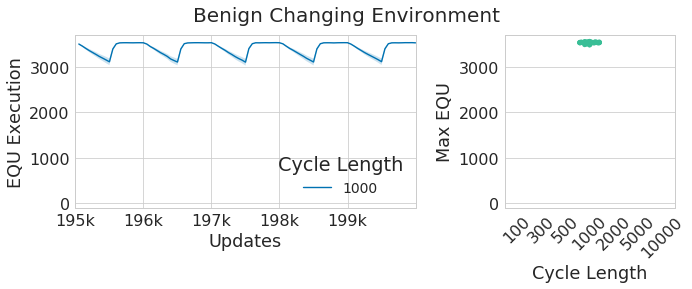

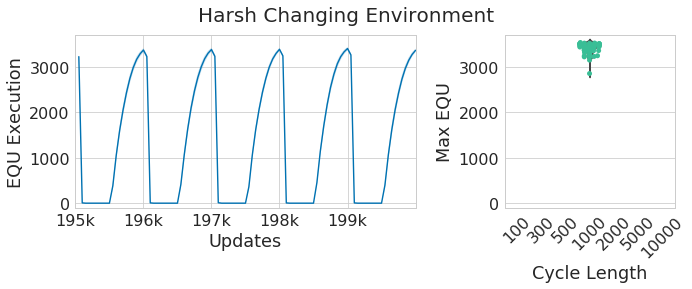

In [27]:
#plot_ts_violins(control, "EQU")
#plt.show()

plot_ts_violins_part(benign, "EQU", "Benign Changing Environment", overtitle=False)
plot_ts_violins_part(harsh, "EQU", "Harsh Changing Environment", overtitle=False, leg=False)



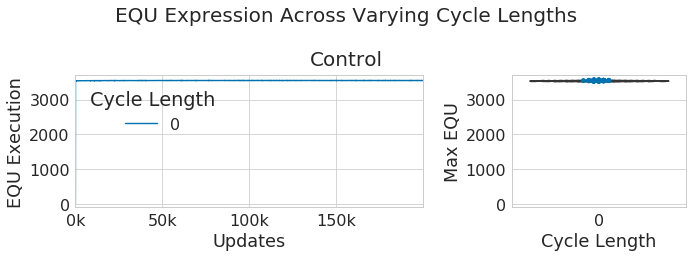

In [28]:
part = control
field="EQU"

plt.rcParams['figure.figsize'] = (18, 4)

fig = plt.figure(figsize=(10, 3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax0 = plt.subplot(gs[0])

plt.figtext(.5,.95,'EQU Expression Across Varying Cycle Lengths\n\nControl', 
            fontsize=20, ha='center')







ax1 = plt.subplot(gs[0])    
#segment = part.loc[part['update'] > 195000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="length",
                data=part,
                ci=[95],
                ax=ax1
               )
ax.set_ylabel("EQU Execution")
plt.legend(title="Cycle Length", loc=2)
ax.set_xlabel("Updates")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels )   

#plt.show()

#plt.subplot(122)
ax2 = plt.subplot(gs[1])

piece = part.loc[part['update'] == 199000]

ax = sns.violinplot(x="length", y=field,# hue='bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               ax=ax2,
               #order=['100', '300', '500', '1000', '2000', '5000', '10000'],
               )
sns.swarmplot(x="length", y=field,# hue='bonus', 
              data=piece, 
              split=True,
              #order=['100', '300', '500', '1000', '2000', '5000', '10000'],                  
                 )
ax.set_ylim([-100,3700])
ax.set_ylabel("Max EQU")
ax.set_xlabel("Cycle Length")
plt.tight_layout()

#plt.title("Max ")
    


([<matplotlib.axis.XTick at 0x7fde51bf4250>,
 <a list of 5 Text xticklabel objects>)

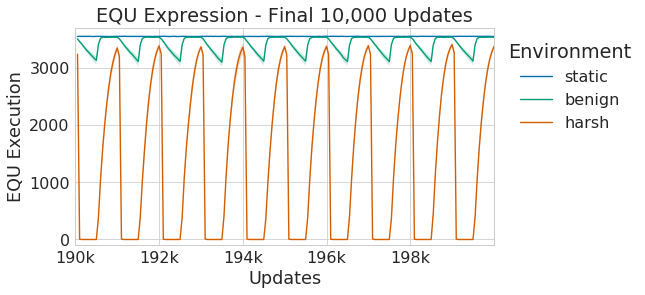

In [40]:
part = data
field="EQU"

plt.rcParams['figure.figsize'] = (18, 4)

fig = plt.figure(figsize=(7.5, 4)) 
gs = gridspec.GridSpec(1, 1, width_ratios=[1])



ax1 = plt.subplot(gs[0])    
part = part.loc[part['update'] > 190000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part,
                ci=[95],
                ax=ax1
               )
ax.set_title('EQU Expression - Final 10,000 Updates')

ax.set_ylabel("EQU Execution")
plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels )   

#plt.show()



#plt.tight_layout()

#plt.title("Max ")
    


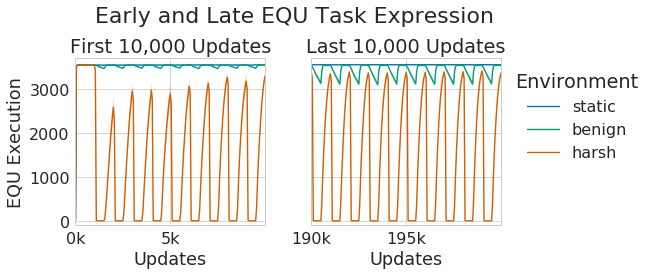

In [61]:
part = data
field="EQU"

plt.rcParams['figure.figsize'] = (18, 4)

fig = plt.figure(figsize=(7.5, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])



ax1 = plt.subplot(gs[0])    
part1 = part.loc[part['update'] <= 10000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part1,
                ci=[95],
                ax=ax1,
                legend=False
               )
ax.set_title('First 10,000 Updates')

ax.set_ylabel("EQU Execution")
#plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels )   

#plt.show()



#plt.tight_layout()

#plt.title("Max ")
    

    
    
ax2 = plt.subplot(gs[1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
part2 = part.loc[part['update'] >= 190000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part2,
                ci=[95],
                ax=ax2
               )
ax.set_title('Last 10,000 Updates')

#ax.set_ylabel("EQU Execution")
plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylabel("")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels ) 

plt.suptitle("           Early and Late EQU Task Expression", size=22)
plt.tight_layout()
plt.subplots_adjust(top=0.80)


/Core/home/rosiec/__research/changing_environments/raw_data/100_CycleLengthSurvey/analysis


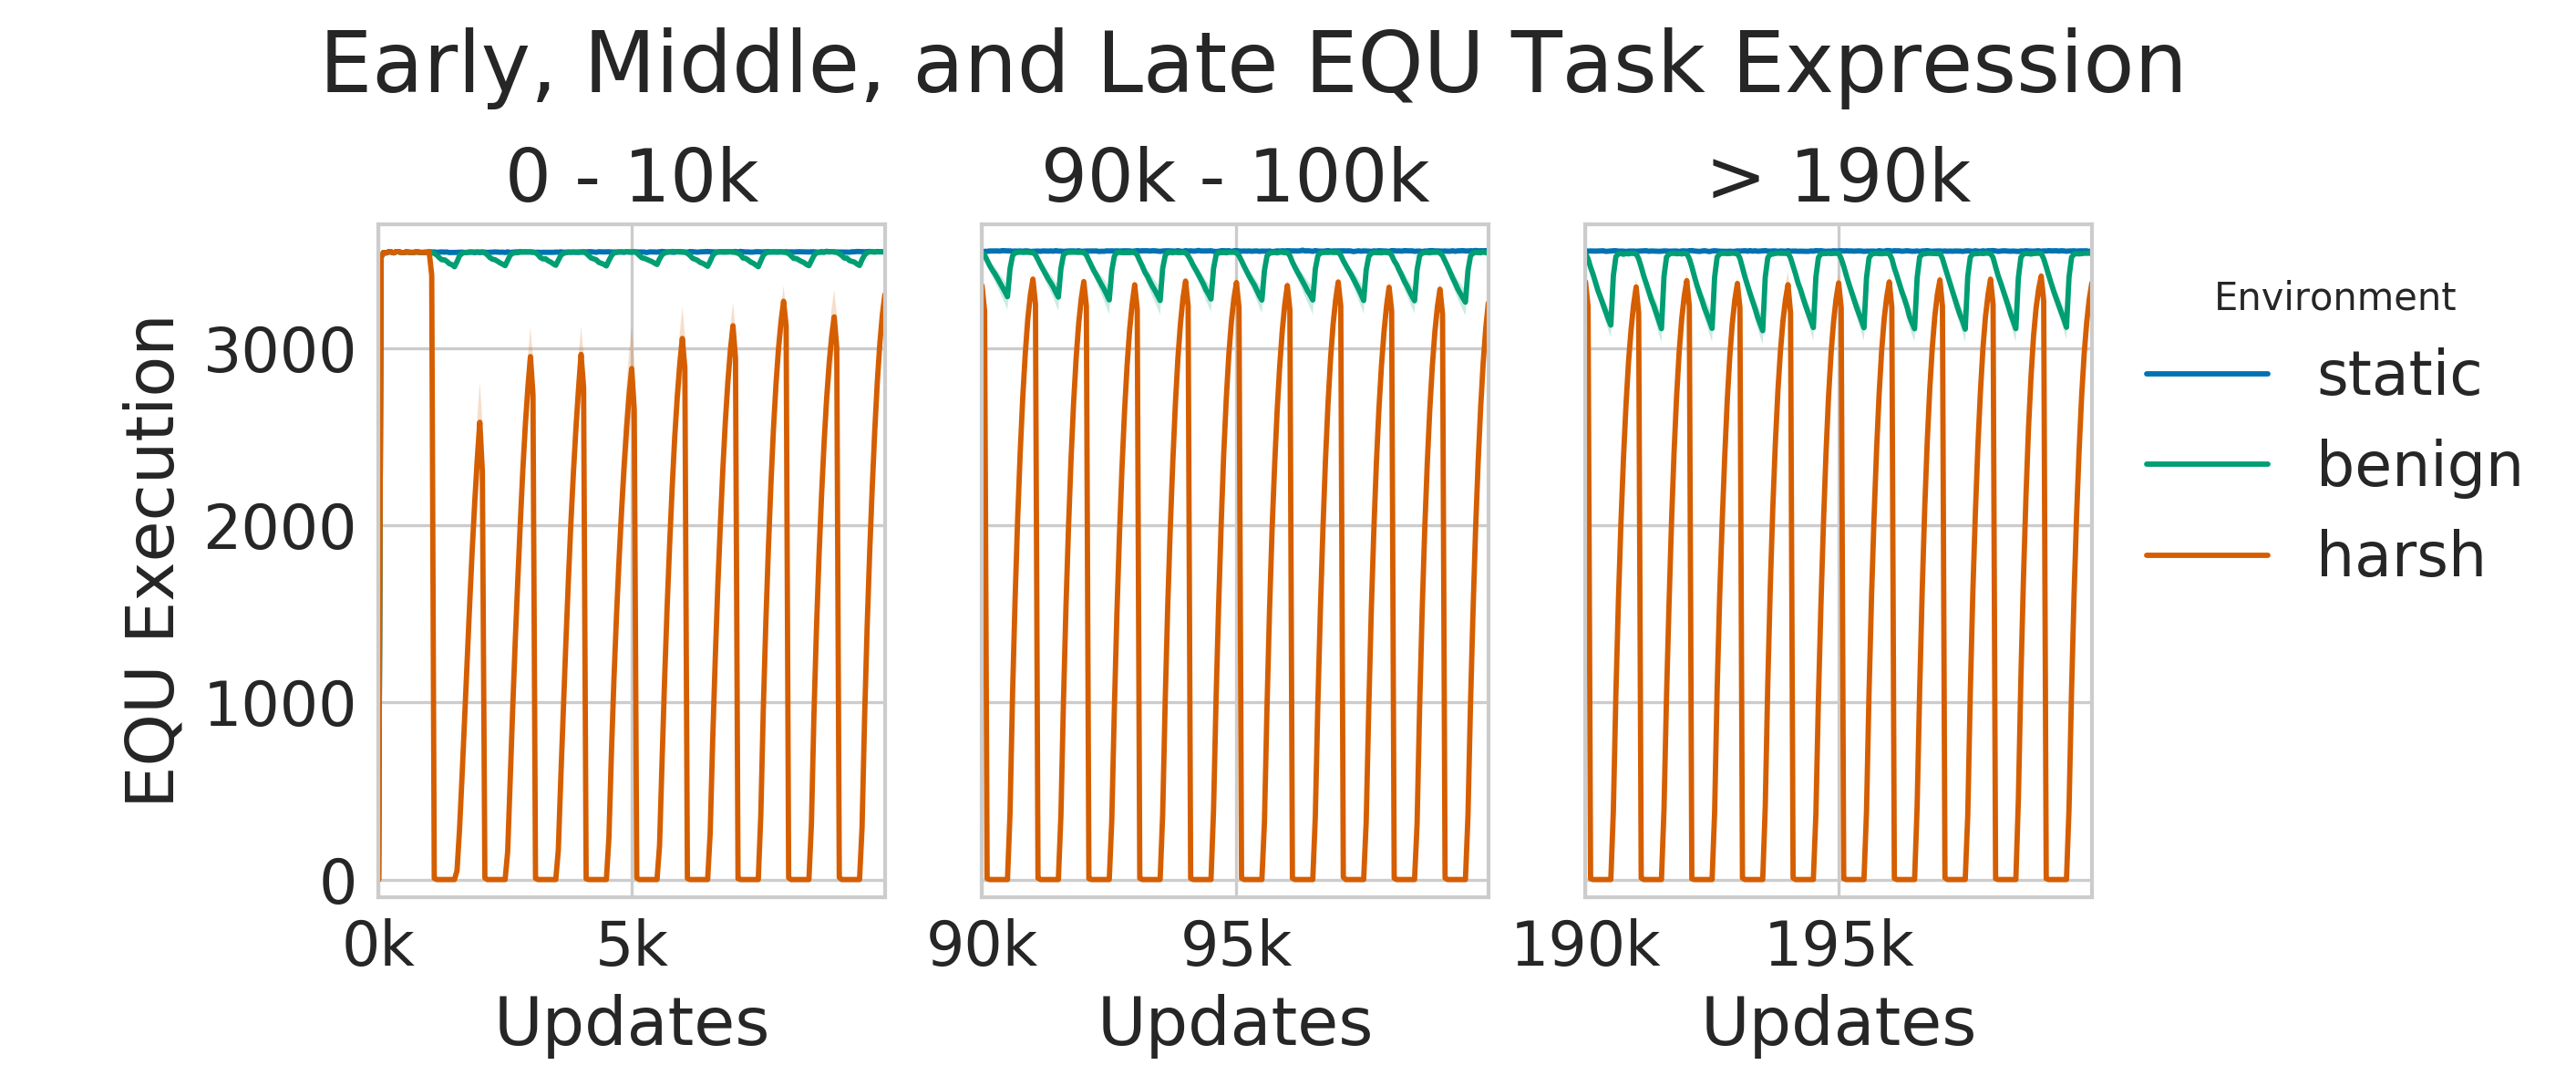

In [76]:
part = data
field="EQU"

plt.rcParams['figure.figsize'] = (18, 4)

fig = plt.figure(figsize=(7.5, 4)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])



ax1 = plt.subplot(gs[0])    
part1 = part.loc[part['update'] <= 10000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part1,
                ci=[95],
                ax=ax1,
                legend=False
               )
ax.set_title('0 - 10k')

ax.set_ylabel("EQU Execution")
#plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels )   

#plt.show()



#plt.tight_layout()

#plt.title("Max ")
    

ax2 = plt.subplot(gs[1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
part2 = part.loc[part['update'] < 100000]
part2 = part2.loc[part2['update'] >= 90000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part2,
                ci=[95],
                ax=ax2,
                legend=False
               )
ax.set_title('90k - 100k')

#ax.set_ylabel("EQU Execution")
#plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylabel("")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels ) 

#plt.suptitle("           Early, Middle, and Late EQU Task Expression", size=22)
plt.tight_layout()
plt.subplots_adjust(top=0.80)    
    
    
    
    
    
    
    
    
ax3 = plt.subplot(gs[2], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
part3 = part.loc[part['update'] >= 190000]
ax = sns.tsplot(time="update", value=field,
                unit="replicate", 
                condition="cycle",
                data=part3,
                ci=[95],
                ax=ax3
               )
ax.set_title('> 190k')

#ax.set_ylabel("EQU Execution")
plt.legend(title="Environment", loc=2, bbox_to_anchor=(1, 1))
ax.set_xlabel("Updates")
ax.set_ylabel("")
ax.set_ylim([-100,3700])
xlocs, xlabels = plt.xticks()
xmodlabels = []
xmodlocs = []
for i in range(0, len(xlocs)-1):
    xmodlocs.append( xlocs[i] )
    #if i == 0:
    #    xmodlabels.append(int(xlocs[i]))
    #else:
    #    print xlabels[i]
    #    print xlocs[i]
    xmodlabels.append(str(int(xlocs[i])/1000) + "k")
plt.xticks( xmodlocs, xmodlabels ) 

plt.suptitle("           Early, Middle, and Late EQU Task Expression", size=22)
#plt.tight_layout()
plt.subplots_adjust(top=0.80)

!pwd
plt.savefig("CCE_equ_execution.png", dpi=300)